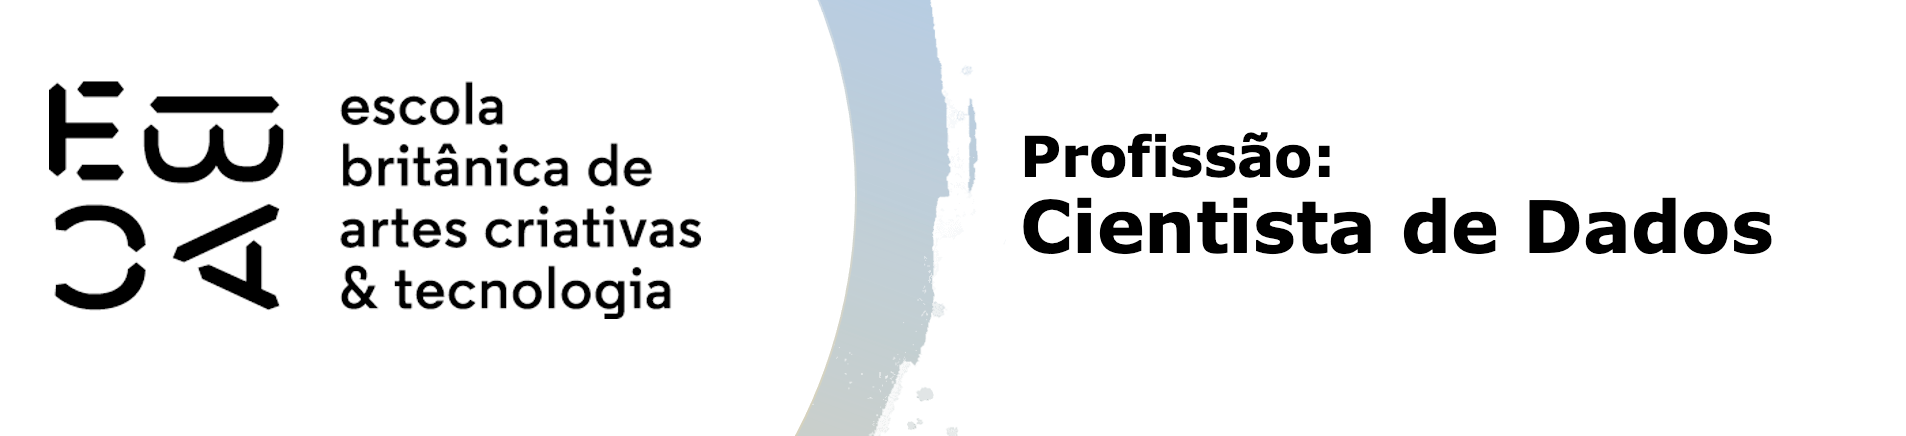

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [24]:
#conferindo se coluna de datas já está no formato correto
df.dtypes

CNPJ emit.                     object
Emitente                       object
No.                             int64
Data Emissão           datetime64[ns]
Valor NF                      float64
Data Registro          datetime64[ns]
Créditos                      float64
Situação do Crédito          category
Ano                             int64
Semestre                        int64
Retorno                       float64
flag_credito                    int64
categoria                      object
dtype: object

In [25]:
#ajustando base a partir de janeiro de 2020
df = df.loc[df['Data Emissão'] >= '2020-01-01']

print(f''' 
    Data mínima: {df['Data Emissão'].min()}.
    Data máxima: {df['Data Emissão'].max()}.
    ''') 

 
    Data mínima: 2020-01-01 00:00:00.
    Data máxima: 2021-12-31 00:00:00.
    


In [27]:
#proporção de notas que tiveram retorno>0 por categoria de estabelecimento

#quantidade de notas que tiveram retorno por categoria
qtd_retorno_cat = df.groupby('categoria')['Retorno'].count() 
qtd_retorno_cat

categoria
Alimentos        5050
Auto posto        540
Construção      16044
Farmácia        10189
Mercado         27553
Restaurantes     2179
Varejo           4182
Vestuário        1915
não definido    18348
Name: Retorno, dtype: int64

In [36]:
#apenas linhas com retorno > 0
df_retorno = df[df['Retorno'] > 0]

#quantidade de notas que tiveram retorno > 0 por categoria
qtd_retornomaior_cat = df_retorno.groupby('categoria')['Retorno'].count() 
qtd_retornomaior_cat

categoria
Alimentos        3442
Auto posto        135
Construção       7523
Farmácia         3582
Mercado         13177
Restaurantes     1626
Varejo            701
Vestuário         443
não definido     6689
Name: Retorno, dtype: int64

In [55]:
#proporção de notas que tiveram retorno > 0 por categoria de estabelecimento
prop_retorno_cat = qtd_retornomaior_cat / qtd_retorno_cat
prop_retorno_cat = prop_retorno_cat.sort_values(ascending=False)
prop_retorno_cat

categoria
Restaurantes    0.746214
Alimentos       0.681584
Mercado         0.478242
Construção      0.468898
não definido    0.364563
Farmácia        0.351556
Auto posto      0.250000
Vestuário       0.231332
Varejo          0.167623
Name: Retorno, dtype: float64

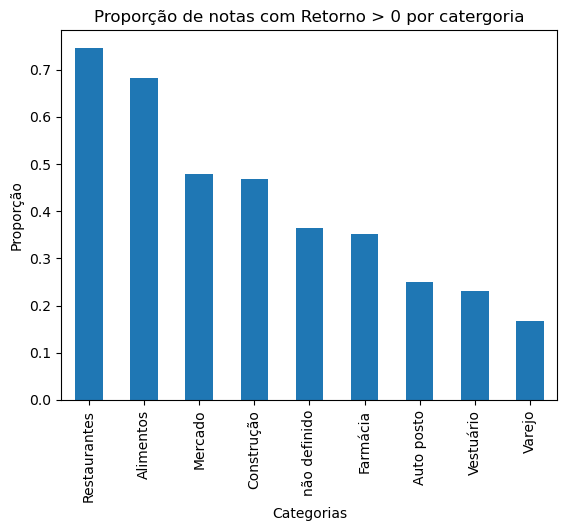

In [86]:
prop_retorno_cat.plot(kind='bar')
plt.title('Proporção de notas com Retorno > 0 por catergoria')
plt.xlabel('Categorias')
plt.ylabel('Proporção');

In [60]:
prop_retorno_cat_total = qtd_retornomaior_cat / qtd_retornomaior_cat.sum()
prop_retorno_cat_total = prop_retorno_cat_total.sort_values(ascending=False)
prop_retorno_cat_total

categoria
Mercado         0.353100
Construção      0.201592
não definido    0.179243
Farmácia        0.095986
Alimentos       0.092234
Restaurantes    0.043571
Varejo          0.018785
Vestuário       0.011871
Auto posto      0.003618
Name: Retorno, dtype: float64

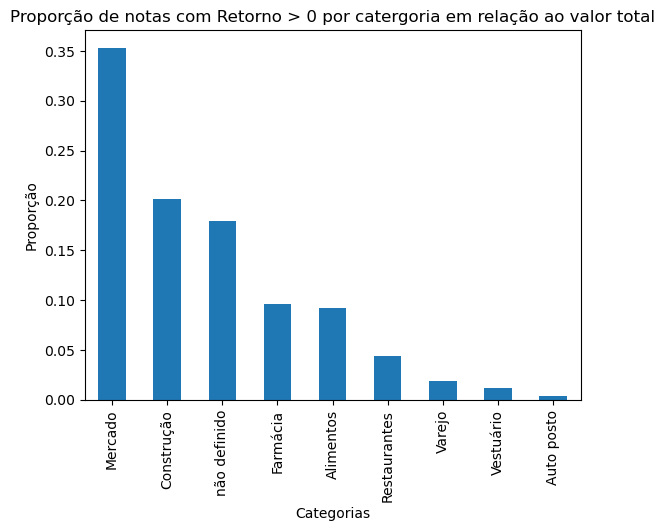

In [85]:
prop_retorno_cat_total.plot(kind='bar')
plt.title('Proporção de notas com Retorno > 0 por catergoria em relação ao valor total')
plt.xlabel('Categorias')
plt.ylabel('Proporção');

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [72]:
#categorizando retorno como 0 e maior que 0
df['Retorno_cat'] = pd.cut(df['Retorno'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria,Retorno_cat
64598,05.234.750/0001-41,TX BURGER LTDA,77882,2020-01-01,78.80,2020-08-01,0.0,A Calcular,2019,2,0.0,0,não definido,0
64599,47.508.411/1476-88,CIA BRASILEIRA DE DISTRIBUICAO,20087,2020-01-01,22.71,2020-01-01,0.0,A Calcular,2019,2,0.0,0,Mercado,0
64600,09.060.964/0108-39,PIMENTA VERDE ALIMENTOS LTDA,82366,2020-01-01,35.90,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Alimentos,0
64601,61.412.110/0307-39,DROGARIA SAO PAULO S A,234178,2020-01-01,21.77,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Farmácia,0
64602,46.952.032/0001-98,PANIFICADORA E CONFEITARIA QUELUZ LTDA,3305,2020-01-01,80.95,2020-08-01,0.0,A Calcular,2019,2,0.0,0,Restaurantes,0


In [73]:
tab = pd.crosstab(df.categoria, df.Retorno_cat, margins=True, margins_name='total')
tab

Retorno_cat,0,1,total
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8521,7523,16044
Farmácia,6607,3582,10189
Mercado,14376,13177,27553
Restaurantes,553,1626,2179
Varejo,3481,701,4182
Vestuário,1472,443,1915
não definido,11659,6689,18348


In [76]:
tab['odds'] = tab[1]/tab[0] 
tab['odds_ratio'] = tab['odds']/tab.loc['total', 'odds']
tab['woe'] = np.log(tab.odds_ratio)
tab

Retorno_cat,0,1,total,odds,odds_ratio,woe
categoria,,,,,,
Alimentos,1608,3442,5050,2.140547,2.792382,1.026895
Auto posto,405,135,540,0.333333,0.434839,-0.832779
Construção,8521,7523,16044,0.882878,1.151730,0.141265
Farmácia,6607,3582,10189,0.542152,0.707247,-0.346375
Mercado,14376,13177,27553,0.916597,1.195717,0.178746
Restaurantes,553,1626,2179,2.940325,3.835707,1.344354
Varejo,3481,701,4182,0.201379,0.262702,-1.336733
Vestuário,1472,443,1915,0.300951,0.392596,-0.934974
não definido,11659,6689,18348,0.573720,0.748428,-0.289780


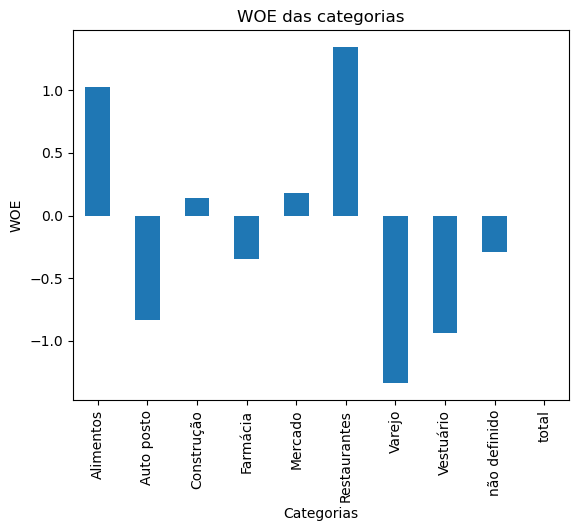

In [87]:
tab.woe.plot(kind='bar')
plt.title('WOE das categorias')
plt.xlabel('Categorias')
plt.ylabel('WOE');

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [92]:
tab1 = pd.crosstab(df.categoria, df.Retorno_cat, margins=True, margins_name='total')

rótulo_evento = tab1.columns[1]
rótulo_nao_evento = tab1.columns[0]

tab1['pct_evento'] = tab1[rótulo_evento]/tab1.loc['total',rótulo_evento]
tab1['pct_nao_evento'] = tab1[rótulo_nao_evento]/tab1.loc['total',rótulo_nao_evento]
tab1['woe'] = np.log(tab1.pct_evento/tab1.pct_nao_evento)
tab1

Retorno_cat,0,1,total,pct_evento,pct_nao_evento,woe
categoria,,,,,,
Alimentos,1608,3442,5050,0.092234,0.033031,1.026895
Auto posto,405,135,540,0.003618,0.008319,-0.832779
Construção,8521,7523,16044,0.201592,0.175034,0.141265
Farmácia,6607,3582,10189,0.095986,0.135718,-0.346375
Mercado,14376,13177,27553,0.353100,0.295304,0.178746
Restaurantes,553,1626,2179,0.043571,0.011359,1.344354
Varejo,3481,701,4182,0.018785,0.071505,-1.336733
Vestuário,1472,443,1915,0.011871,0.030237,-0.934974
não definido,11659,6689,18348,0.179243,0.239493,-0.289780


In [93]:
tab1['iv_parcial'] = (tab1.pct_evento - tab1.pct_nao_evento)*tab1.woe
print(tab1.iv_parcial.sum())
tab1

0.24096448519764424


Retorno_cat,0,1,total,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,
Alimentos,1608,3442,5050,0.092234,0.033031,1.026895,0.060796
Auto posto,405,135,540,0.003618,0.008319,-0.832779,0.003916
Construção,8521,7523,16044,0.201592,0.175034,0.141265,0.003752
Farmácia,6607,3582,10189,0.095986,0.135718,-0.346375,0.013762
Mercado,14376,13177,27553,0.353100,0.295304,0.178746,0.010331
Restaurantes,553,1626,2179,0.043571,0.011359,1.344354,0.043304
Varejo,3481,701,4182,0.018785,0.071505,-1.336733,0.070473
Vestuário,1472,443,1915,0.011871,0.030237,-0.934974,0.017172
não definido,11659,6689,18348,0.179243,0.239493,-0.289780,0.017459


In [94]:
iv = ((tab1.pct_evento - tab1.pct_nao_evento)*tab1.woe).sum()
print(f'O Information Value é {iv}')

O Information Value é 0.24096448519764424


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


<font color='purple'> 

- As categorias com maior probabilidade de retorno são Restaurantes (75%), Alimentos (68%), Mercado (48%) e Construção (47%). 
- Na base o maior número de notas com retorno pertence à categoria Mercado (35%).
- Alimentos e Restaurantes apresentam os maiores WOE positivos, mostrando de fato que apresentam maior probabilidade de retorno. Varejo e Vestuário apresentam menor probabilidade de retorno, com os maiores WOE negativos.
- O Information Value da variável ``categoria`` é cerca de 0,24 - o que seria considerado com um poder preditivo médio pela tabela de Naeem Siddiqi. 

</font>